In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [76]:

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/online-retail-data/OnlineRetail.csv


In [77]:
Data = pd.read_csv("/kaggle/input/online-retail-data/OnlineRetail.csv",encoding='iso-8859-1')

In [78]:
Data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [79]:
Data['TotalCost']=Data['Quantity']*Data['UnitPrice']

In [80]:
Data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [81]:
Data['Date']=[item[0] for item in Data['InvoiceDate'].str.split()]
Data['Time']=[item[1] for item in Data['InvoiceDate'].str.split()]
Data['Month']=[item[1] for item in Data['Date'].str.split('-')]
Data['Year']=[item[2] for item in Data['Date'].str.split('-')]

In [82]:
Data['Month']

0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: Month, Length: 541909, dtype: object

In [83]:
Month={'1':'Jan' , '2':'Feb' , '3':'Mar', '4':'Apr' ,'5':'May' , '6':'Jun' ,
       '7':'Jul' , '8':'Aug' , '9':'Sep' , '10':'Oct', '11':'Nov' ,'12':'Dec',
       '01':'Jan' , '02':'Feb' , '03':'Mar', '04':'Apr' ,'05':'May' , '06':'Jun' ,
       '07':'Jul' , '08':'Aug' , '09':'Sep' }

Data=Data.replace({"Month": Month})

In [84]:
Data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost,Date,Time,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30,01-12-2010,08:26,Dec,2010
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34,01-12-2010,08:26,Dec,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00,01-12-2010,08:26,Dec,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34,01-12-2010,08:26,Dec,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34,01-12-2010,08:26,Dec,2010


In [89]:
temp_df = Data.groupby(["Month"])["TotalCost"].agg(["size","mean"]).reset_index()
temp_df["Month"] = pd.to_datetime(temp_df.Month, format='%b', errors='coerce').dt.month
temp_df = temp_df.sort_values(by="Month")



trace = go.Scatter(
    x=temp_df['Month'],
    y=temp_df['size'],
    marker=dict(
        color="#1E90FF",
    ),
)

layout = go.Layout(
    title=go.layout.Title(
        text="Number of Sales - Month on Month",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")

In [87]:
temp_df = Data.groupby(["Month"])["TotalCost"].agg(["mean"]).reset_index()
temp_df["Month"] = pd.to_datetime(temp_df.Month, format='%b', errors='coerce').dt.month
temp_df = temp_df.sort_values(by="Month")


In [88]:

trace = go.Scatter(
    x=temp_df['Month'],
    y=temp_df['mean'],
    marker=dict(
        color="#1E90FF",
    ),
)

layout = go.Layout(
    title=go.layout.Title(
        text="Average cost of Sales - Month on Month",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Retail")

In [ ]:
temp_df

In [90]:
def horizontal_bar_chart(srs, color):
    trace = go.Bar(
        x=srs.values[::-1],
        y=srs.index[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

cnt_srs = Data['Country'].value_counts().head(7)
layout = go.Layout(
    title=go.layout.Title(
        text="Number of Sales in Top 7 Country",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=800,
)

data = [horizontal_bar_chart(cnt_srs, "#1E90FF")]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Retail")


In [91]:
def horizontal_bar_chart(srs, color):
    trace = go.Bar(
        x=srs.values[::-1],
        y=srs.index[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

cnt_srs = Data['Country'].value_counts().tail(7)
layout = go.Layout(
    title=go.layout.Title(
        text="Number of Sales in Least 7 Country",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=800,
)

data = [horizontal_bar_chart(cnt_srs, "#1E90FF")]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Retail")


In [92]:
temp_df = Data.groupby(["Country","Month"])["TotalCost"].agg(["size", "mean"]).reset_index()
temp_df.columns = ["Country","Month", "Size", "Mean"]

In [93]:
temp_df = Data.groupby(["Country","Month"])["TotalCost"].agg(["size", "mean"]).reset_index()
temp_df

,Country,Month,size,mean
0,Australia,Apr,20,16.670000
1,Australia,Aug,107,210.179439
2,Australia,Dec,35,28.717143
3,Australia,Feb,91,160.741429
4,Australia,Jan,127,71.005591
...,...,...,...,...
291,Unspecified,Jul,221,6.449819
292,Unspecified,Jun,9,20.642222
293,Unspecified,May,58,18.204655
294,Unspecified,Nov,53,18.221698


In [94]:
temp_df = Data.groupby(["Country","Month"])["TotalCost"].agg(["size", "mean"]).reset_index()
temp_df.columns = ["Country","Month", "Size", "Mean"]
temp_df= temp_df.sort_values(by=['Mean'])

def horizontal_bar_chart(srs, color):
    trace = go.Bar(
        x=temp_df['Mean'].head(7),
        y=temp_df['Country'].head(7),
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

cnt_srs = temp_df['Mean'].head(7)
layout = go.Layout(
    title=go.layout.Title(
        text="Average Cost spend by Country",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=800,
)

data = [horizontal_bar_chart(cnt_srs, "#1E90FF")]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Retail")


In [95]:
temp_df.sort_values(by="Size", ascending=False).reset_index()[:100]

,index,Country,Month,Size,Mean
0,286,United Kingdom,Nov,78640,16.312383
1,279,United Kingdom,Dec,64051,16.634839
2,287,United Kingdom,Oct,54521,16.093582
3,288,United Kingdom,Sep,45533,18.931723
4,282,United Kingdom,Jul,35964,15.723497
...,...,...,...,...,...
95,56,Cyprus,Feb,157,25.564013
96,268,Switzerland,May,153,23.315098
97,33,Belgium,May,149,18.302013
98,238,Spain,Dec,146,14.487397


In [103]:
temp_df = Data.groupby(["Country","Month"])["TotalCost"].agg(["size", "mean"]).reset_index()
temp_df.columns = ["Country","Month", "Size", "Mean"]
#temp_df.Country = temp_df[temp_df.Country != 'United Kingdom']
temp_df=temp_df.sort_values(by="Mean", ascending=False).reset_index()[:100]
temp_df=temp_df.head(50)
fig = px.scatter(temp_df, x="Month", y="Country", color="Country", size="Mean")
layout = go.Layout(
    title=go.layout.Title(
        text="Mean Purchase over Month by Country",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=600,
    showlegend=False
)
fig.update_layout(layout)
fig.show()

In [97]:
temp_df = Data.groupby(["Country","Month"])["TotalCost"].agg(["size", "mean"]).reset_index()
temp_df.columns = ["Country","Month", "Size", "Mean"]
#temp_df.Country = temp_df[temp_df.Country != 'United Kingdom']
temp_df=temp_df.sort_values(by="Size", ascending=False).reset_index()[:100]
#temp_df=tem
fig = px.scatter(temp_df, x="Month", y="Country", color="Country", size="Size")
layout = go.Layout(
    title=go.layout.Title(
        text="Number of Purchase over Month by Country",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=600,
    showlegend=False
)
fig.update_layout(layout)
fig.show()

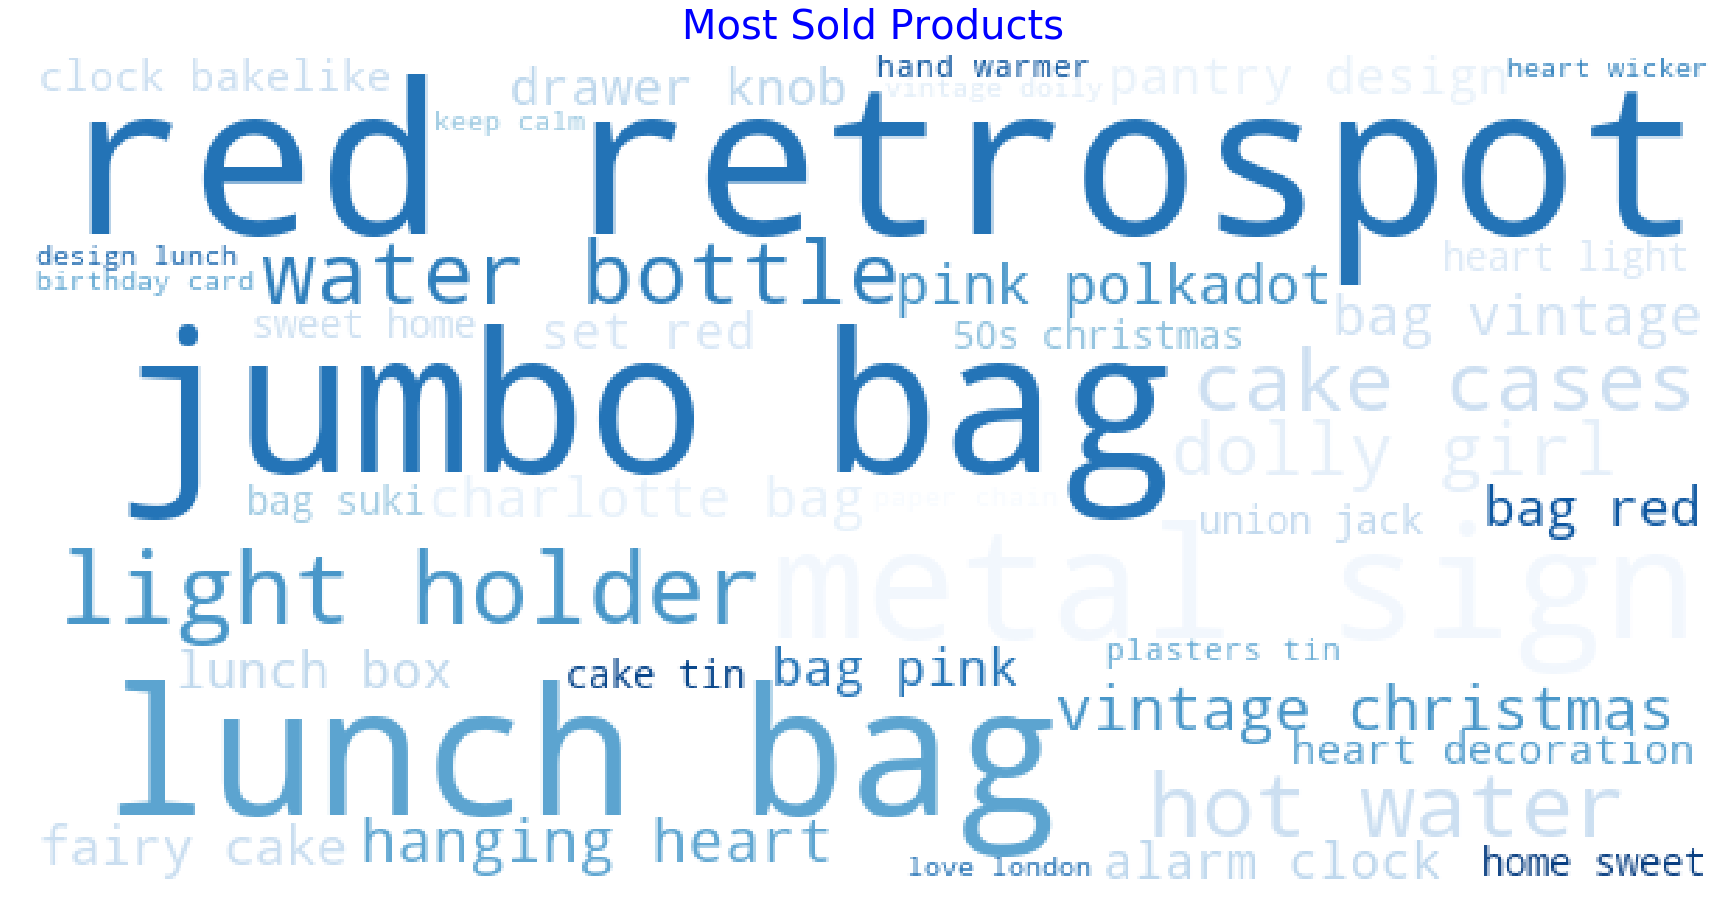

In [98]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

inv_names = []
for invs in Data['Description']:
    for inv in str(invs).split():
        if inv != "":
            inv_names.append(inv.strip().lower().replace("'",""))
            
def plot_wordcloud(text, mask=None, max_words=40, max_font_size=80, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown', 'nan', ' nan'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    prefer_horizontal = 1.0,
                    max_font_size = max_font_size, 
                    min_font_size = 10,
                    random_state = 42,
                    #color_func = lambda *args, **kwargs: (140,0,0),
                    #color_func = color_map(),
                    colormap="Blues",
                    width=600, 
                    height=300,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        #image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_color), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size, 'color': 'blue',
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'blue', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

plot_wordcloud(' '.join(inv_names), title="Most Sold Products")

In [108]:
Data['Description']=Data.groupby(["Country","UnitPrice","Date"])['Description'].transform(lambda x: x.fillna(x.mode()))
Data['Description']=Data['Description'].transform(lambda x: x.fillna("Others"))

In [123]:
temp_df = Data.groupby(["Description","Month"])["TotalCost"].agg(["size", "mean"]).reset_index()
temp_df.columns = ["Description","Month", "Size", "Mean"]
temp_df= temp_df.sort_values(by=['Mean'])

temp_df=temp_df.sort_values(by="Size", ascending=False).reset_index()[:50]
#temp_df=tem
fig = px.scatter(temp_df, x="Month", y="Description", color="Description", size="Size")
layout = go.Layout(
    title=go.layout.Title(
        text="Number of Purchase over Month by Description",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=600,
    showlegend=False
)
fig.update_layout(layout)
fig.show()

In [124]:
temp_df = Data.groupby(["Description","Month"])["TotalCost"].agg(["size", "mean"]).reset_index()
temp_df.columns = ["Description","Month", "Size", "Mean"]
temp_df= temp_df.sort_values(by=['Mean'])

temp_df=temp_df.sort_values(by="Size", ascending=False).reset_index().tail(50)
#temp_df=tem
fig = px.scatter(temp_df, x="Month", y="Description", color="Description", size="Size")
layout = go.Layout(
    title=go.layout.Title(
        text="Number of Purchase over Month by Description",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=600,
    showlegend=False
)
fig.update_layout(layout)
fig.show()

In [ ]:
temp_df = Data.groupby(["Description","Month"])["TotalCost"].agg(["size", "mean"]).reset_index()
temp_df.columns = ["Description","Month", "Size", "Mean"]
temp_df= temp_df.sort_values(by=['Mean'])

temp_df=temp_df.sort_values(by="Size", ascending=False).reset_index().tail(50)
#temp_df=tem
fig = px.scatter(temp_df, x="Month", y="Description", color="Description", size="Size")
layout = go.Layout(
    title=go.layout.Title(
        text="Number of Purchase over Month by Description",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=600,
    showlegend=False
)
fig.update_layout(layout)
fig.show()

In [128]:
temp_df = Data.groupby(["Country"])["TotalCost"].agg(["size", "sum"]).reset_index()
temp_df.columns = ["Country", "Size", "Sum"]
#temp_df.Country = temp_df[temp_df.Country != 'United Kingdom']
temp_df=temp_df.sort_values(by="Sum", ascending=False).reset_index().head(5)
temp_df=temp_df
fig = px.scatter(temp_df, x="Sum", y="Country", color="Country", size="Sum")
layout = go.Layout(
    title=go.layout.Title(
        text="Top 5 Countries Contributing towards revenue",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=600,
    showlegend=False
)
fig.update_layout(layout)
fig.show()

In [129]:
temp_df = Data.groupby(["Country"])["TotalCost"].agg(["size", "sum"]).reset_index()
temp_df.columns = ["Country", "Size", "Sum"]
#temp_df.Country = temp_df[temp_df.Country != 'United Kingdom']
temp_df=temp_df.sort_values(by="Sum", ascending=False).reset_index().tail(5)
temp_df=temp_df
fig = px.scatter(temp_df, x="Sum", y="Country", color="Country", size="Sum")
layout = go.Layout(
    title=go.layout.Title(
        text="Last 5 Countries Contributing towards revenue",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=600,
    showlegend=False
)
fig.update_layout(layout)
fig.show()

In [132]:
temp_df

,index,Country,Size,Sum
33,4,Brazil,32,1143.60
34,28,RSA,58,1002.31
35,8,Czech Republic,30,707.72
36,2,Bahrain,19,548.40
37,29,Saudi Arabia,10,131.17


In [145]:
temp_df=Data[Data['Country'] == 'United Kingdom']
temp_df = Data.groupby(["Description"])["TotalCost"].agg(["size", "sum"]).reset_index()
temp_df.columns = ["Description", "Size", "Sum"]
#temp_df.Country = temp_df[temp_df.Country != 'United Kingdom']
temp_df=temp_df.sort_values(by="Sum", ascending=False).head(10)
temp_df=temp_df

In [146]:
def horizontal_bar_chart(srs, color):
    trace = go.Bar(
        x=temp_df['Sum'],
        y=temp_df['Description'],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

cnt_srs = temp_df['Sum']
layout = go.Layout(
    title=go.layout.Title(
        text="Top Sources Contributing to UK's Revenue",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=800,
)

data = [horizontal_bar_chart(cnt_srs, "#1E90FF")]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Retail")



In [149]:
df=Data[Data['Country'] == 'United Kingdom']
df = Data.groupby(["Description"])["TotalCost"].agg(["size", "sum"]).reset_index()
df.columns = ["Description", "Size", "Sum"]

In [154]:
print("Total  % of income of from these top 10 product in UK is",sum(temp_df['Sum'])/sum(df["Sum"])*100)

Total  % of income of from these top 10 product in UK is 9.959655466815235


In [157]:
temp_df=Data[['Month','Description']]
temp_df["Month"] = pd.to_datetime(temp_df.Month, format='%b', errors='coerce').dt.month
temp_df = temp_df.sort_values(by="Month")

In [159]:
nunique()

NameError: name 'corr' is not defined